In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.shape

(42000, 785)

In [4]:
#i.e there are 28000 images of 28*28 size
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
10980,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import matplotlib.pyplot as plt

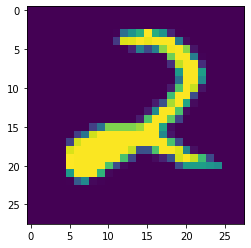

In [8]:
plt.imshow(df.iloc[10980,1:].values.reshape(28,28))

In [9]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
7881,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


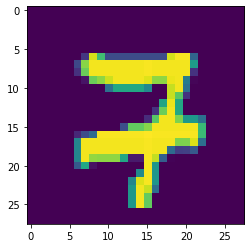

In [11]:
plt.imshow(df.iloc[7881,1:].values.reshape(28,28))

In [12]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
X_train.shape

(33600, 784)

# applying knn

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn=KNeighborsClassifier()


In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [18]:
#to measure time
import time
start=time.time()
y_pred=knn.predict(X_test)
print(time.time()-start)

21.491928339004517


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

# now applying pca,for this we have to first standardise my data

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [21]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# pca

In [23]:
from sklearn.decomposition import PCA 
pca=PCA(n_components=None)#none will give no of principle components equal to no of columns

In [24]:
#in this step we found eigen values and eigen vectors and we shifted our data to new coordinate axis,and
#now my data is in new transform coordinate
X_train=pca.fit_transform(X_train) 
X_test=pca.transform(X_test)

In [25]:
X_train.shape

(33600, 784)

#reducing the principle components to 100

In [26]:
pca=PCA(n_components=100)

In [27]:
X_train_new=pca.fit_transform(X_train)
X_test_new=pca.transform(X_test)

In [28]:
X_train_new.shape

(33600, 100)

In [29]:
knn=KNeighborsClassifier()

In [30]:
knn.fit(X_train_new,y_train)

KNeighborsClassifier()

In [31]:
#to measure time
import time
start=time.time()
y_pred=knn.predict(X_test_new)
print(time.time()-start)

8.400214910507202


In [32]:
accuracy_score(y_test,y_pred)

0.9538095238095238



#checking the acuuracy for 1 to 100principle component

In [33]:
for i in range(1,100):
    pca=PCA(n_components=i)
    X_train_new=pca.fit_transform(X_train)
    X_test_new=pca.transform(X_test)
    knn.fit(X_train_new,y_train)
    y_pred=knn.predict(X_test_new)
    print(accuracy_score(y_test,y_pred))

0.25761904761904764
0.32404761904761903
0.51
0.6660714285714285
0.7377380952380952
0.8227380952380953
0.8422619047619048
0.8717857142857143
0.886547619047619
0.9048809523809523
0.9116666666666666
0.9188095238095239
0.9279761904761905
0.9348809523809524
0.9389285714285714
0.9371428571428572
0.94
0.9413095238095238
0.9433333333333334
0.9436904761904762
0.9441666666666667
0.9436904761904762
0.9453571428571429
0.9453571428571429
0.9470238095238095
0.9486904761904762
0.9475
0.9477380952380953
0.9489285714285715
0.95
0.9510714285714286
0.9507142857142857
0.9496428571428571
0.9504761904761905
0.9520238095238095
0.9522619047619048
0.9514285714285714
0.9517857142857142
0.9519047619047619
0.9517857142857142
0.9533333333333334
0.9525
0.9528571428571428
0.9534523809523809
0.9533333333333334
0.9532142857142857
0.9530952380952381
0.9538095238095238
0.9542857142857143
0.9536904761904762
0.9529761904761904
0.9545238095238096
0.9533333333333334
0.9533333333333334
0.9547619047619048
0.9535714285714286
0


#now the 1st objective of pca has been achieved i.e dimensionality reduction
#we are now going to achive second objective of pca i.e data visualization

In [34]:
#transforming to a 2d coordinate system
pca=PCA(n_components=2)
X_train_new=pca.fit_transform(X_train)
X_test_new=pca.transform(X_test)

In [35]:
X_train_new

array([[-2.71862226, -0.49061929],
       [-0.67663455, -6.75162453],
       [-3.03321208,  6.51015033],
       ...,
       [ 2.14887649,  0.78195427],
       [ 1.05947054,  0.94607623],
       [17.70258719,  1.96078455]])

In [36]:
import plotly.express as px        #plotly makes the plot interactive 
y_train_new=y_train.astype(str)
fig=px.scatter(x=X_train_new[:,0],
               y=X_train_new[:,1],
               color=y_train_new,
               color_discrete_sequence=px.colors.qualitative.G10
              )
fig.show()

In [37]:
#transforming to a 3d coordinate system
pca=PCA(n_components=3)
X_train_new=pca.fit_transform(X_train)
X_test_new=pca.transform(X_test)

In [38]:
X_train_new

array([[-2.71852855, -0.48813297,  1.13484388],
       [-0.67703117, -6.75493652, -2.33507425],
       [-3.03325389,  6.50971994,  7.49168979],
       ...,
       [ 2.14878058,  0.78000453, -0.7468593 ],
       [ 1.05971914,  0.95018617,  3.94857934],
       [17.70260222,  1.96226125, -4.94398627]])

In [42]:
import plotly.express as px
y_train_new=y_train.astype(str)
fig=px.scatter_3d(df,x=X_train_new[:,0],
               y=X_train_new[:,1],
               z=X_train_new[:,2],
               color=y_train_new)
fig.update_layout(
    margin=dict(l=20,r=20,t=20,b=20)
    
)
            
fig.show()

#finding eigen values and eigen vectors

In [43]:
#eigen values
pca.explained_variance_

array([40.67111197, 29.17023331, 26.74459605])

In [44]:
#eigen vectors
pca.components_

array([[ 1.00000000e+00, -4.20135193e-09,  1.16032380e-09, ...,
         4.51767865e-34, -1.46883079e-33, -2.86641108e-35],
       [ 3.75021242e-09,  9.99999995e-01,  1.24394126e-07, ...,
         4.16415238e-34, -5.97105420e-34,  1.80884357e-34],
       [-9.90769102e-10, -1.19696084e-07,  9.99999999e-01, ...,
         2.45322841e-33,  4.84385247e-34, -5.34430068e-34]])

In [45]:
#see the shape of eigen vectors i.e 784 arrows coming to 3 dimension
pca.components_.shape

(3, 784)

# finding optimum numbers of principle components

In [46]:
pca.explained_variance_ratio_#explains the contribution of our eigen vectors in percentage(so multiply *100)

array([0.05785192, 0.0414927 , 0.03804239])

In [47]:
#finding optimum number
pca=PCA(n_components=None)
X_train_new=pca.fit_transform(X_train)
X_test_new=pca.transform(X_test)

In [48]:
pca.explained_variance_.shape

(784,)

In [49]:
pca.components_

array([[ 1.00000000e+00, -6.00709583e-17,  7.84483978e-17, ...,
         5.06534212e-34, -1.42824690e-33, -1.25212555e-35],
       [ 6.00709583e-17,  1.00000000e+00, -9.99200722e-15, ...,
         2.56768125e-33, -7.54026927e-33,  1.80555933e-34],
       [-7.84483978e-17,  1.23234756e-14,  1.00000000e+00, ...,
         5.05245057e-33, -3.25460413e-33, -6.51505969e-34],
       ...,
       [-0.00000000e+00,  1.44784657e-32,  7.05789185e-33, ...,
         2.87133988e-01,  2.65359831e-02,  1.13379693e-01],
       [-0.00000000e+00, -2.30269258e-32, -1.00409170e-32, ...,
         1.93055024e-01,  2.40965621e-01,  1.08105865e-02],
       [-0.00000000e+00, -1.44058176e-33,  1.77239429e-32, ...,
        -1.33412804e-01,  7.36976166e-01,  9.88890377e-03]])

In [50]:
pca.components_.shape

(784, 784)

In [51]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [52]:
#now taking the cumulative sum of to find optimum no at 90% varience as at 90% the model will do well
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

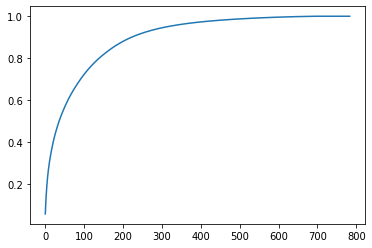

In [53]:
#rather than manually counting at which number we get 90%,we will use plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))

from above graph we find that at 200 component we get 90% varience which is good ,so in this we will use 200 as
the value of n_components.